## Importing the necessary libraries and loading the data

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt


df=pd.read_csv(r"C:\Users\VARUN SHARMA\PycharmProjects\pythonProject\student-mat.csv",sep=";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df[df.columns[11:24]].head()

,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel
0,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4
1,father,1,2,0,no,yes,no,no,no,yes,yes,no,5
2,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4
3,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3
4,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [6]:
df.age[0]

18

In [7]:
df.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

In [8]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

### separating out the columns with integer as datatype as we will be using those in project further

In [9]:
cond=df.columns[df.dtypes=="int64"]
df1=df[cond]
df1.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10


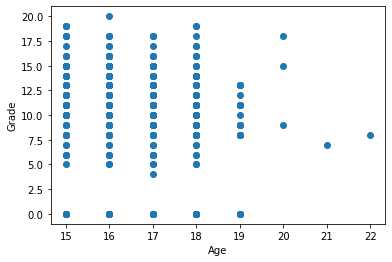

In [10]:
plt.scatter(df1.age,df1.G3)
plt.xlabel("Age")
plt.ylabel("Grade")
plt.show()
#sure we can't gon to apply linear regression for this kind of dependency, because its difficult to find out the best fit line

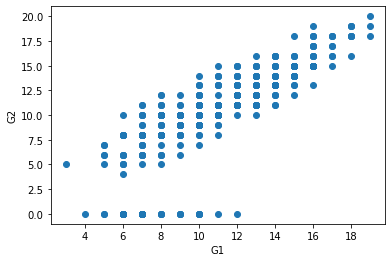

In [15]:
plt.scatter(df1.G1,df1.G3)
plt.xlabel("G1")
plt.ylabel("G2")
plt.show()
# Linear dependency can be clearly observed 

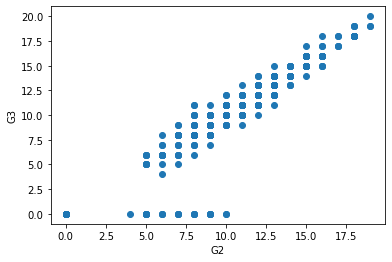

In [17]:
plt.scatter(df1.G2,df1.G3)
plt.xlabel("G2")
plt.ylabel("G3")
plt.show()
# Linear dependency can be clearly seen over here also, this type of relationships can be used in the model

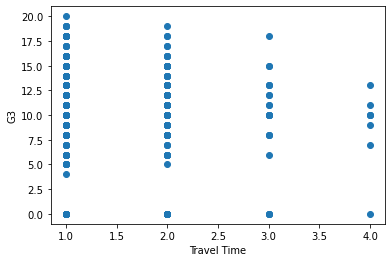

In [31]:
plt.scatter(df1.traveltime,df1.G3)
plt.xlabel("Travel Time")
plt.ylabel("G3")
plt.show()
# clearly we cannot use theis treveltime column as linear dependency cananot be spotted 

plt.scatter(df.G1,df.G3,color="blue",label="G1")
plt.scatter(df.G2,df.G3,color="green",label="G2")
plt.legend()
plt.show()

In [12]:
X=df1[["freetime","studytime","G1","G2"]]
Y=df1[["G3"]]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)
clf=linear_model.LinearRegression()
clf.fit(X_train,Y_train)
acc=clf.score(X_test,Y_test)
print(acc)

0.8450925085513963


In [13]:
print("slope of the best fit line ", clf.coef_)
print("ïntercept of the best fit line ",clf.intercept_)

slope of the best fit line  [[ 0.07193872 -0.16173429  0.1705743   0.98162992]]
ïntercept of the best fit line  [-1.8217761]


### As we can see there are five slopes(coef) as there are five variables and in 4-D the will be need five coef, line in 4-D will be like y=m1x+m2y+m3z+m4p+c, c being the intercept

In [14]:
prediction=clf.predict(X_test)
for i in range(len(prediction)):
    print(prediction[i],end=" ")
    

[-0.40309982] [9.0808908] [-0.77094529] [14.03969632] [6.03736546] [8.35945393] [-0.73540841] [9.73649115] [15.20975739] [8.3417739] [13.45347369] [4.81322252] [11.96012086] [13.1211651] [6.61218706] [16.66757334] [8.12595775] [9.42203941] [7.9375266] [10.9420891] [15.784579] [14.1383319] [7.54857513] [9.35894071] [7.59381699] [12.05875644] [7.28820526] [8.61098379] [15.11112181] [9.66455243] [7.52187827] [18.64851321] [15.45227041] [19.11585922] [7.87186689] [11.84276347] [8.6135448] [-0.84288401] [8.68292251] [12.31010948] [10.58308365] [14.92269065] [6.65028495] [8.4492495] [10.91539224] [10.78035482] [15.11996182] [6.40521093] [5.15437112] [15.32693796] [11.15790526] [14.8330719] [-0.90598271] [8.36847077] [18.90004306] [4.16390118] [8.3417739] [6.30657534] [13.14786196] [13.1211651] [12.95943081] [14.10279502] [7.12647098] [12.69923776] [16.50583905] [13.04922638] [12.80671336] [16.67641335] [11.72644785] [15.36247484] [3.85828946] [6.37851406] [15.11112181] [-0.67230971] [10.3494